# Factuality Tests (FactReasoner)

In [1]:
import json
import math
import gravis as gv
import matplotlib.pyplot as plt

# Local
from fm_factual.fact_graph import FactGraph
from fm_factual.atom_extractor import AtomExtractor
from fm_factual.atom_reviser import AtomReviser
from fm_factual.context_retriever import ContextRetriever
from fm_factual.nli_extractor import NLIExtractor
from fm_factual.fact_reasoner import FactReasoner


In [2]:
# Set up the components of the pipeline
model = "llama-3.1-70b-instruct"
nli_prompt_version = "v1"
cache_dir = "/home/radu/data/cache"
merlin_path = "/home/radu/git/fm-factual/lib/merlin"

context_retriever = ContextRetriever(service_type="langchain", top_k=3, cache_dir=cache_dir)
atom_extractor = AtomExtractor(model)
atom_reviser = AtomReviser(model)
nli_extractor = NLIExtractor(model, prompt_version=nli_prompt_version)

# Create the FactReasoner pipeline
pipeline = FactReasoner(
    context_retriever=context_retriever,
    atom_extractor=atom_extractor,
    atom_reviser=atom_reviser,
    nli_extractor=nli_extractor,
    merlin_path=merlin_path,
    model=model,
    debug_mode=True,
    use_priors=False
)


[AtomExtractor] Using LLM on RITS: openai/meta-llama/llama-3-1-70b-instruct
[AtomExtractor] Using prompt version: v2
[AtomReviser] Using LLM on RITS: openai/meta-llama/llama-3-1-70b-instruct
[AtomReviser] Using prompt version: v1
[NLIExtractor] Using LLM on RITS: openai/meta-llama/llama-3-1-70b-instruct
[NLIExtractor] Prompt version: v1
[FactReasoner] Using LLM on RITS: openai/meta-llama/llama-3-1-70b-instruct
[FactReasoner] Using merlin at: /home/radu/git/fm-factual/lib/merlin
[FactReasoner] Using atom/context priors: False


In [ ]:
# Load the test FactGraph
# fg = FactGraph()
# fg.from_json(json_file="/home/radu/git/fm-factual/examples/graph5.json")
# pipeline.from_fact_graph(fact_graph=fg)

# Load the data file
json_file = "/home/radu/git/fm-factual/examples/test.json"
with open(json_file) as f:
    data_dict = json.load(f)
pipeline.from_dict_with_contexts(data=data_dict)
pipeline.build(
    has_atoms=True,
    has_contexts=True,
    revise_atoms=False,
    rel_atom_context=True,
    rel_context_context=True,
    contexts_per_atom_only=False,
    remove_duplicates=True
)

[FactReasoner] Loading the atoms ...
[FactReasoner] Atoms found: 26
Atom a0: Lanny Flaherty is an American.
Atom a1: Lanny Flaherty is an actor.
Atom a2: Lanny Flaherty was born on December 18, 1949.
Atom a3: Lanny Flaherty was born in Pensacola.
Atom a4: Lanny Flaherty has appeared in numerous films.
Atom a5: Lanny Flaherty has appeared in numerous television shows.
Atom a6: Lanny Flaherty has appeared in numerous theater productions.
Atom a7: Lanny Flaherty's career began in the late 1970s.
Atom a8: Lanny Flaherty's notable film credits include King of New York.
Atom a9: Lanny Flaherty's notable film credits include The Abyss.
Atom a10: Lanny Flaherty's notable film credits include Natural Born Killers.
Atom a11: Natural Born Killers is a film.
Atom a12: Lanny Flaherty's notable film credits include The Game.
Atom a13: Lanny Flaherty's notable film credits include The Straight Story.
Atom a14: Lanny Flaherty has appeared in television shows.
Atom a15: Lanny Flaherty has appeared in L

NLI: 100%|██████████| 546/546 [00:00<00:00, 73926.33prompts/s]


[c_a0_0 -> a0] : entailment : 0.9762460761356954
[c_a0_0 -> a1] : entailment : 0.9815060689145222
[c_a0_1 -> a1] : entailment : 0.9563986076055158
[c_a0_0 -> a2] : contradiction : 0.9833446424428881
[c_a0_0 -> a4] : entailment : 0.9703461944384602
[c_a0_0 -> a5] : entailment : 0.9620582083979958
[c_a0_0 -> a10] : entailment : 0.9574817272843577
[c_a4_0 -> a11] : entailment : 0.9661026033444344
[c_a0_0 -> a11] : entailment : 0.9187719630707556
[c_a0_0 -> a14] : entailment : 0.9815556118784974
[c_a20_2 -> a20] : entailment : 0.934528772587932
[Building context-context relations...]
[NLIExtractor] Prompts created: 210


NLI: 100%|██████████| 210/210 [00:00<00:00, 78918.00prompts/s]


[NLIExtractor] Prompts created: 210


NLI: 100%|██████████| 210/210 [00:00<00:00, 69601.25prompts/s]


[c_a0_2 -> c_a0_0] : entailment : 0.517961832183368
[c_a11_1 -> c_a0_0] : entailment : 0.5037199859157261
[c_a0_0 -> c_a2_0] : entailment : 0.9061903243025636
[Relations built: 14]
[FactReasoner] Building the graphical model ...


Relations: 100%|██████████| 14/14 [00:00<00:00, 93952.41it/s]

[Building the Markov network...]
Adding atom variable a0 with discrete factor (prior)
Adding atom variable a1 with discrete factor (prior)
Adding atom variable a2 with discrete factor (prior)
Adding atom variable a3 with discrete factor (prior)
Adding atom variable a4 with discrete factor (prior)
Adding atom variable a5 with discrete factor (prior)
Adding atom variable a6 with discrete factor (prior)
Adding atom variable a7 with discrete factor (prior)
Adding atom variable a8 with discrete factor (prior)
Adding atom variable a9 with discrete factor (prior)
Adding atom variable a10 with discrete factor (prior)
Adding atom variable a11 with discrete factor (prior)
Adding atom variable a12 with discrete factor (prior)
Adding atom variable a13 with discrete factor (prior)
Adding atom variable a14 with discrete factor (prior)
Adding atom variable a15 with discrete factor (prior)
Adding atom variable a16 with discrete factor (prior)
Adding atom variable a17 with discrete factor (prior)
Addin

In [4]:
# Some plots
fg = pipeline.fact_graph

# Plot the FactGraph
g = fg.as_digraph()

fig = gv.d3(g, show_edge_label=True, edge_label_data_source='label', edge_curvature=0.2)
# fig.display()  # opens the plot in a browser window, can be stored as SVG/JPG/PNG
fig


In [5]:
# Compute the atom scores
results, marginals = pipeline.score()
print(f"[FactReasoner] Results: {results}")
print(f"[FactReasoner] Marginals: {marginals}")

libmerlin 1.7.0
(c) Copyright IBM Corp. 2015 - 2019
All Rights Reserved
[MERLIN] Initialize Merlin engine ...
[MERLIN] + tasks supported  : PR, MAR, MAP, MMAP, EM
[WMB] + i-bound          : 6
[WMB] + iterations       : 10
[WMB] + inference task   : MAR
[WMB] + ordering method  : MinFill
[WMB] + order iterations : 100
[WMB] + elimination      : 0 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 3 1 26 
[WMB] + induced width    : 1
[WMB] + exact inference  : Yes
[WMB] + ordering time    : 0.000215054 seconds
[WMB] Created join graph with 47 clique factors
[WMB] Number of cliques  : 47
[WMB] Number of edges    : 28
[WMB] Max clique size    : 2
[WMB] Max separator size : 1
[WMB] Finished initialization in 0.000784874 seconds
[WMB] Begin message passing over join graph ...
  logZ:    -5.795816 (3.040250e-03) 	d=5.795816e+00	 time=0.001192	i=1
[WMB] Converged after 1 iterations in 0.001204 seconds
PR
-5.795816 (3.040250

var: a0 has marginal: [0.445557, 0.554443]


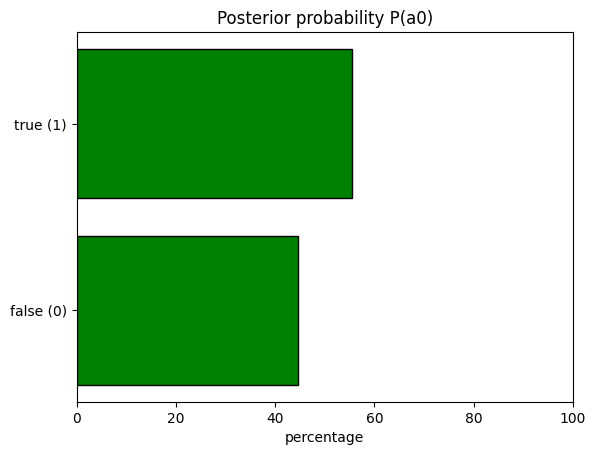

var: a1 has marginal: [0.109773, 0.890227]


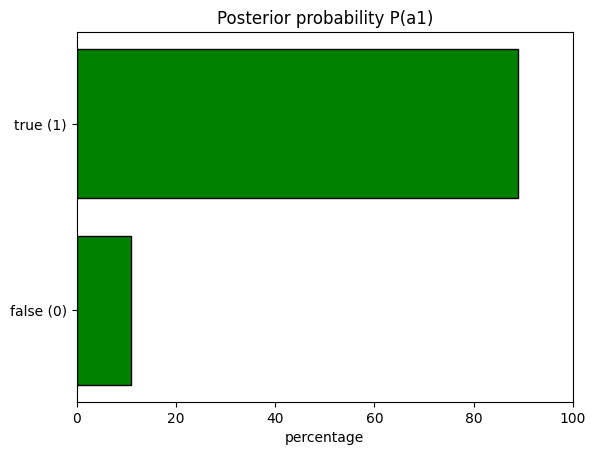

var: a10 has marginal: [0.447702, 0.552298]


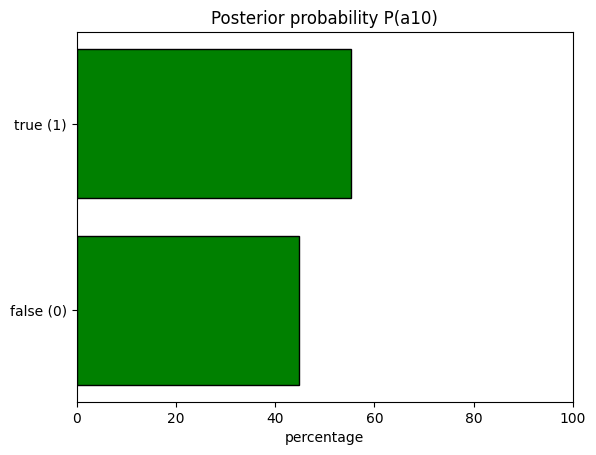

var: a11 has marginal: [0.1043, 0.8957]


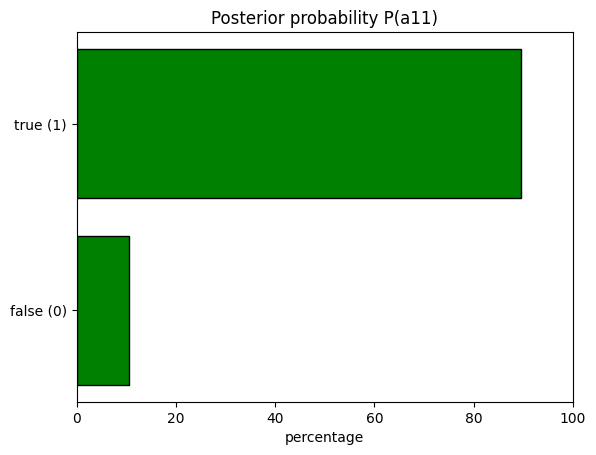

var: a12 has marginal: [0.5, 0.5]


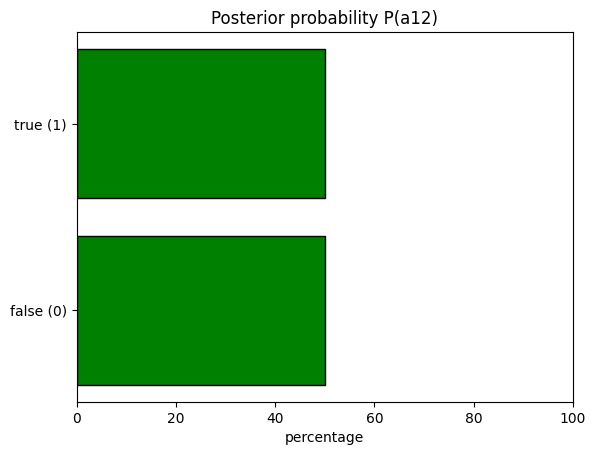

var: a13 has marginal: [0.5, 0.5]


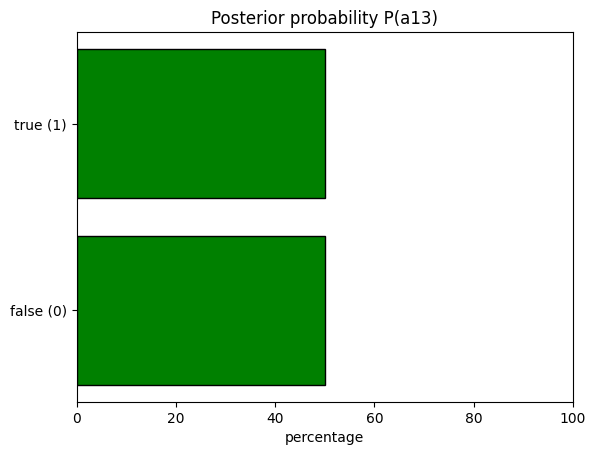

var: a14 has marginal: [0.44495, 0.55505]


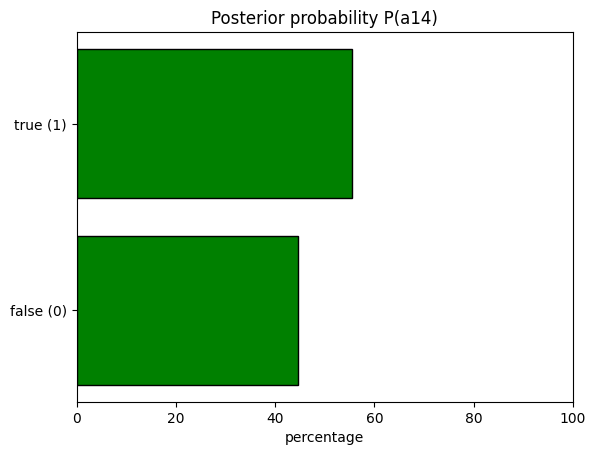

var: a15 has marginal: [0.5, 0.5]


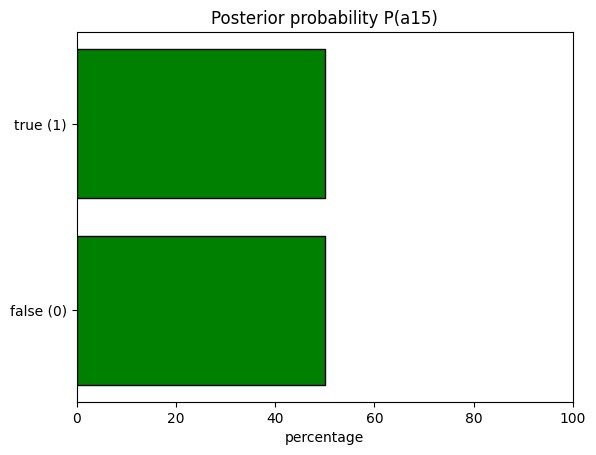

var: a16 has marginal: [0.5, 0.5]


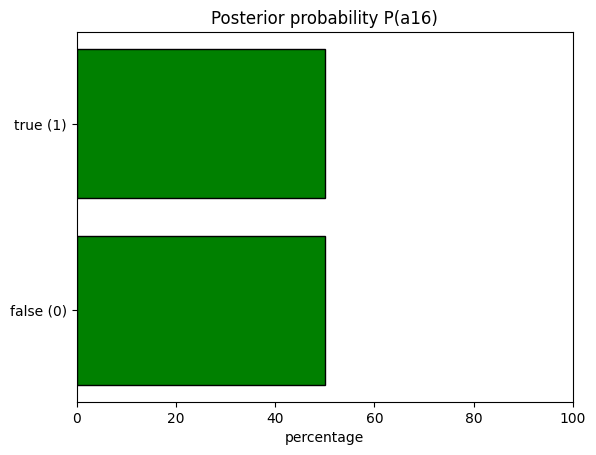

var: a17 has marginal: [0.5, 0.5]


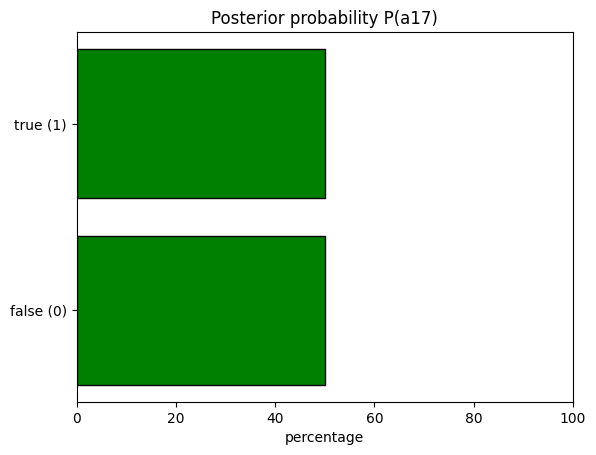

var: a18 has marginal: [0.5, 0.5]


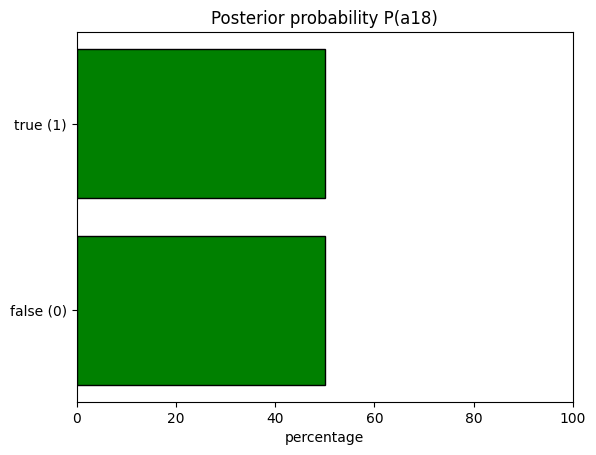

var: a19 has marginal: [0.5, 0.5]


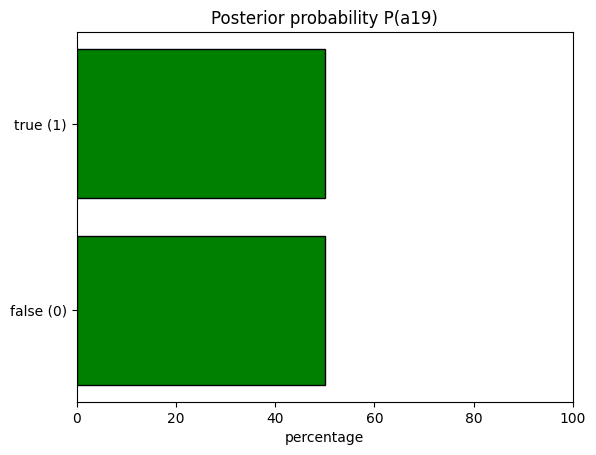

var: a2 has marginal: [0.555254, 0.444746]


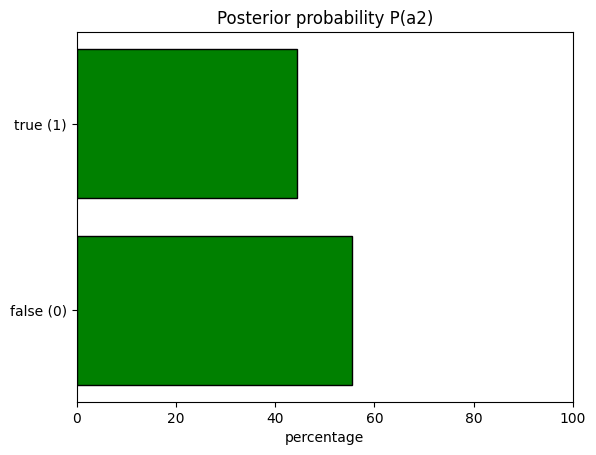

var: a20 has marginal: [0.140193, 0.859807]


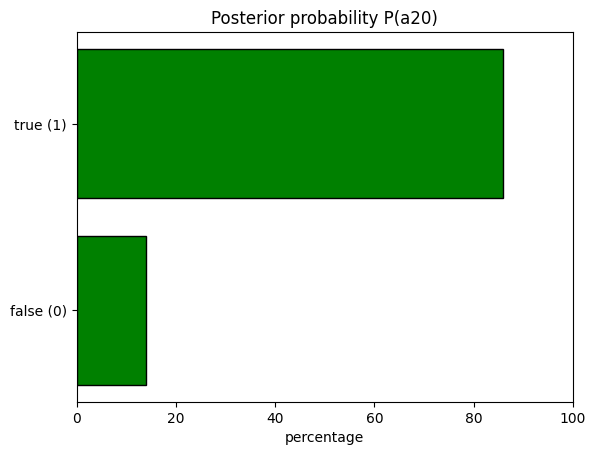

var: a21 has marginal: [0.5, 0.5]


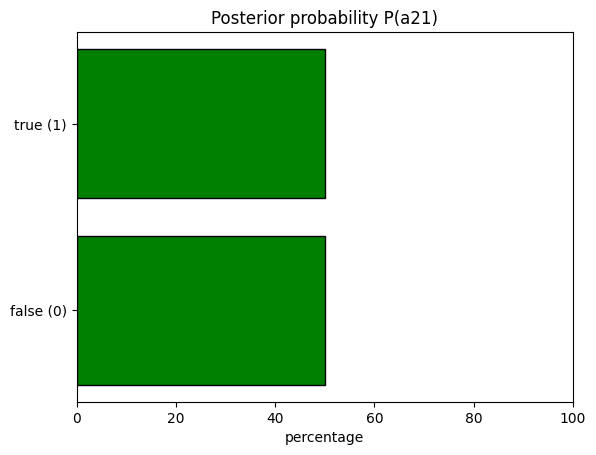

var: a22 has marginal: [0.5, 0.5]


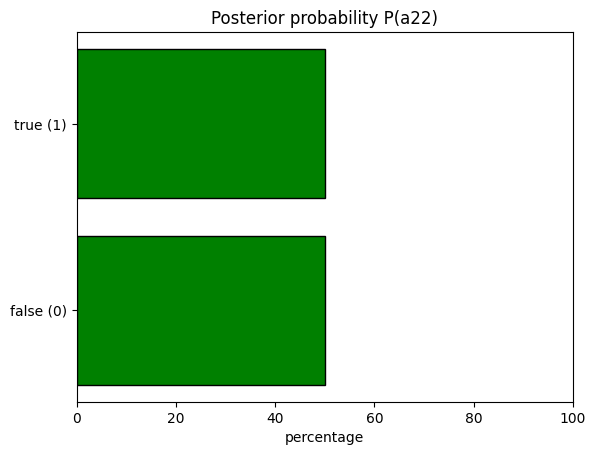

var: a23 has marginal: [0.5, 0.5]


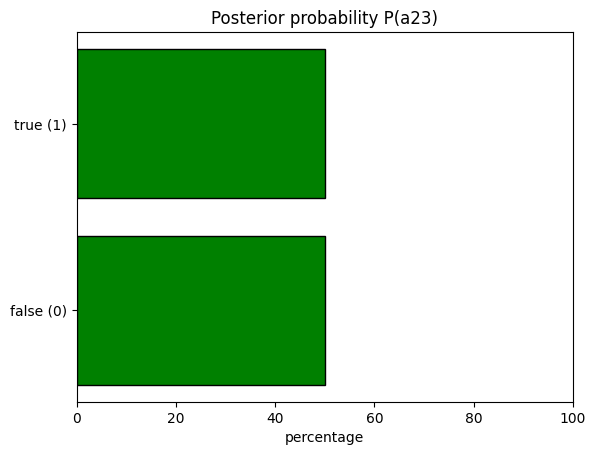

var: a24 has marginal: [0.5, 0.5]


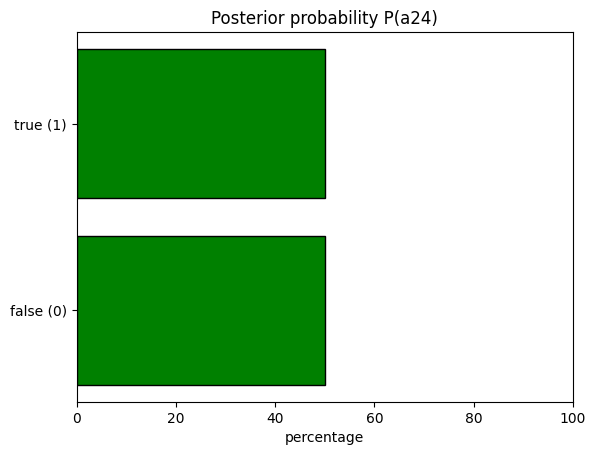

var: a25 has marginal: [0.5, 0.5]


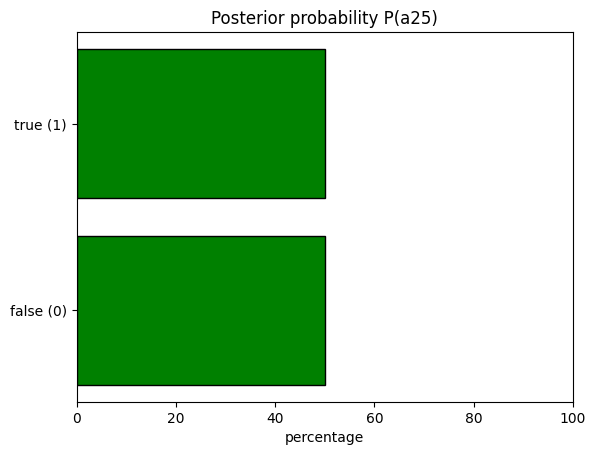

var: a3 has marginal: [0.5, 0.5]


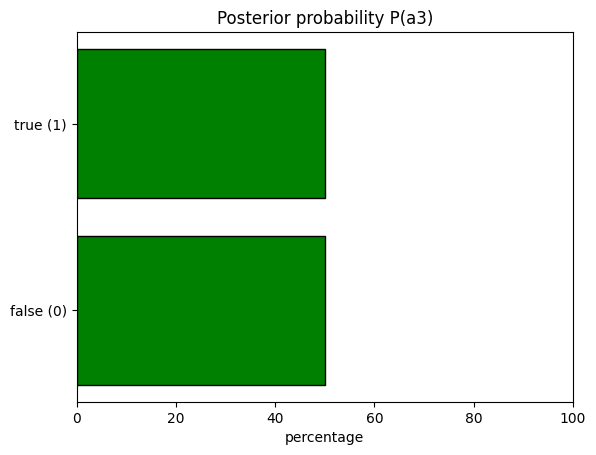

var: a4 has marginal: [0.446232, 0.553768]


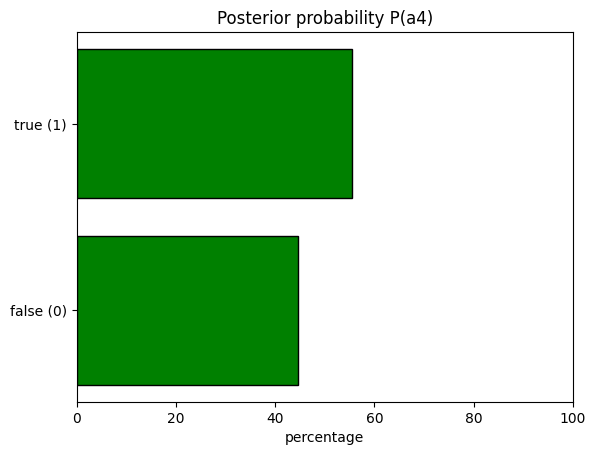

var: a5 has marginal: [0.447179, 0.552821]


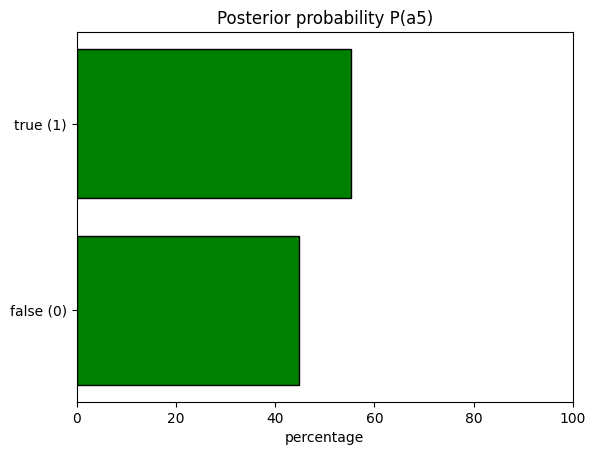

var: a6 has marginal: [0.5, 0.5]


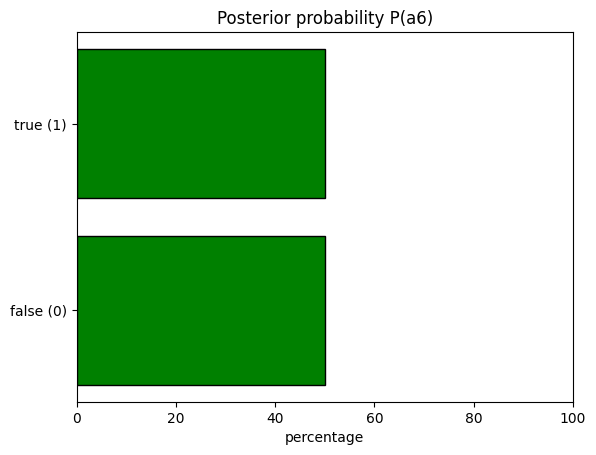

var: a7 has marginal: [0.5, 0.5]


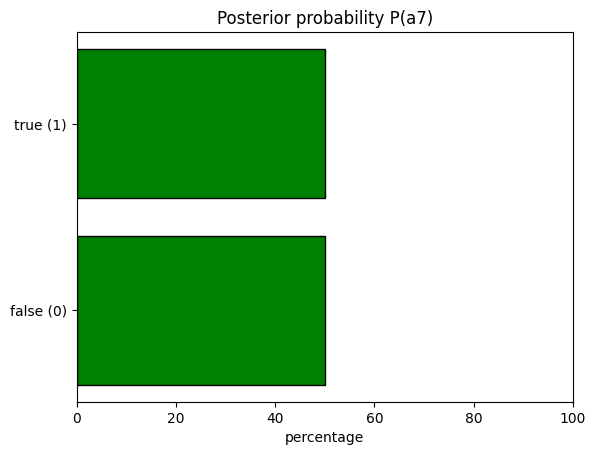

var: a8 has marginal: [0.5, 0.5]


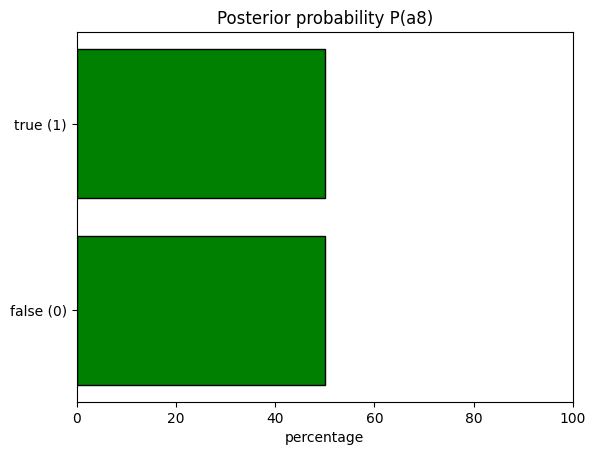

var: a9 has marginal: [0.5, 0.5]


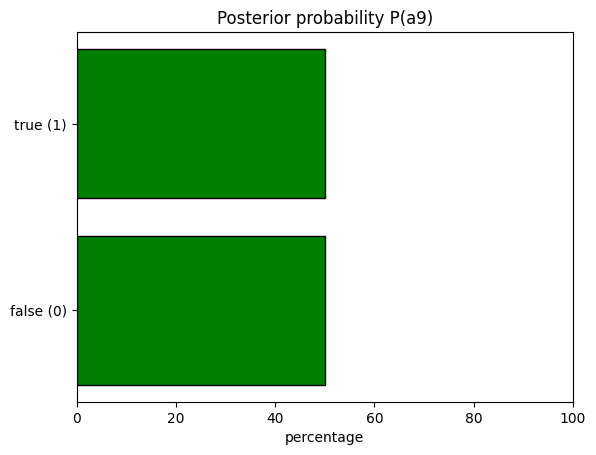

Entropy: 3.57022577086329, 0.13731637580243422, 2.523175278165678


In [6]:
# Plot the marginals
E = 0.0
for info in marginals:
    var = info.get("variable")
    probs = info.get("probabilities")
    p_true = probs[1] if probs[1] > 0.0 else 0.0000001
    E += -p_true*math.log10(p_true)
    print(f'var: {var} has marginal: {probs}')
    y = ['false (0)', 'true (1)']
    x = [val*100.0 for val in probs]
    plt.barh(y, x, color='green', edgecolor='black')

    # setting label of x-axis
    plt.xlabel("percentage") 
    plt.xlim((0, 100))
    plt.title(f"Posterior probability P({var})")
    plt.show()

n = len(marginals)
print(f"Entropy: {E}, {E/len(marginals)}, {E/math.log10(n)}")

In [7]:
n = len(marginals)
print(f"n={n}, log(n)={math.log10(n)}")
print(f"Entropy: {E}, {E/len(marginals)}, {E/math.log10(n)}")

n=26, log(n)=1.414973347970818
Entropy: 3.57022577086329, 0.13731637580243422, 2.523175278165678
